# Lab 4: Predicting breast cancer with machine learning

In this lab we'll read up our training and test data to create a logistic regression model. We'll use different techniques to evaluate the model and use the model for prediction on a held-out dataset. 

#### Libraries used in this lab:
[pandas docs](https://pandas.pydata.org/pandas-docs/stable/)

[seaborn docs](https://seaborn.pydata.org/)

[matplotlib docs](https://matplotlib.org/contents.html)

[numpy docs](https://docs.scipy.org/doc/numpy-1.15.1/reference/index.html)

[sklearn docs](https://scikit-learn.org/stable/documentation.html)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
%matplotlib inline

In [2]:
# read in data prepared from lab 2, split into two data sets
train = pd.read_csv("data_sets/lab_4_train.csv")
test = pd.read_csv("data_sets/lab_4_test.csv")

## Creating a Logistic Regression Model

In this section we use the [LogisticRegression classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) from scikit-learn library. We'll start with the default classifier settings which we will tune later on.

In [31]:
# create list of features, careful to remove diagnosis columns 
features = train.columns.tolist()
features.remove('diagnosis')
features.remove('diagnosis_code')

# fit model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(train[features], train['diagnosis_code'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

## Evaluate model: Error and Accuracy

Use held out test data to evaluate model for accuracy, error, and other metrics. Essentially we are comparing the predicted class against the true class for each example in the test set. 

In [32]:
# create arrays for test predictions and test labels
test_pred = logreg.predict(test[features])
test_true = test['diagnosis_code']

# error and accuracy of model
from sklearn import metrics

def model_metrics(test, logreg, features):
    test_pred = logreg.predict(test[features])
    test_true = test['diagnosis_code']
    print('log loss (error) on test set: {:.2f}'.format(metrics.log_loss(test_true, test_pred)))
    print('Accuracy of model on test set: {:.2f}'.format(metrics.accuracy_score(test_true, test_pred)))
    print('Precision of model on test set: {:.2f}'.format(metrics.precision_score(test_true, test_pred)))
    print('Recall of model on test set: {:.2f}'.format(metrics.recall_score(test_true, test_pred)))

model_metrics(test, logreg, features)

log loss (error) on test set: 4.11
Accuracy of model on test set: 0.88
Precision of model on test set: 0.93
Recall of model on test set: 0.74


The metrics above indicate that we have made a good start to creating a breast cancer predictve model. We'll attempt to improve these numbers futher in following sections

## Evaluate Model: AUC - ROC Curve

In the lecture we reviwed the AUC-ROC curve as a way to evaluate the model across threasholds. Below is the plot from the lecture.
<img src="images/auc_plot.png" style="height:500px">

In the following section we'll recreate the AUC - ROC plot on the test dataset.

AUC score of model on test set: 0.85


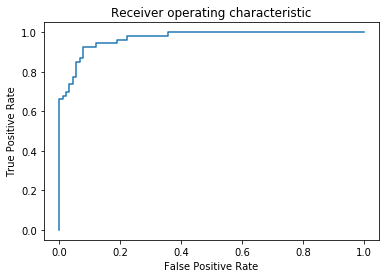

In [33]:
# create auc - roc curve
from sklearn import metrics

def create_roc_curve(test, logreg):
    test_predict_proba = logreg.predict_proba(test[features])[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(y_true=np.array(test_true), y_score=test_predict_proba, pos_label=1)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    print('AUC score of model on test set: {:.2f}'.format(metrics.roc_auc_score(test_true, test_pred)))

create_roc_curve(test, logreg)

## Evaluate Model: Visualize Sigmoid Curve

In the lecture we reviewed the sigmoid function as it relates to making binary classificaiton. Below is the plot from the lecture.
<img src="images/sigmoid.png" style="height:500px">

In the following section we'll plot the test set prediction probabilities against the `radius_mean` dimension. The s-like curve represents presentes a visualization of the sigmoid curve. 

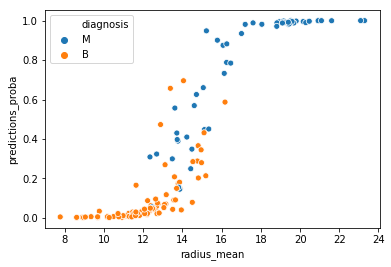

In [6]:
# create a scatter plot of prediction probabilities vs radius_mean
def create_sigmoid_plot(test, logreg, feature):
    test['predictions_proba'] = logreg.predict_proba(test[features])[:,1]
    sns.scatterplot(x=feature, y="predictions_proba", hue = "diagnosis", data=test)
    
create_sigmoid_plot(test, logreg, "radius_mean")

## Tune Model: Hyperparameter tuning using Grid Search

Now that we have evaluated the first version of our Logistic Regression model let's see if we can improve it. We'll use scikit-learn [GridSearch method](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and apply different types of regularization over different values.

In [35]:
# range of regularization values
hyperparameters = {'C':np.logspace(0, 4, 200)}

logisticRegression = LogisticRegression(solver='lbfgs', max_iter=10000)
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(logisticRegression, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(train[features], train['diagnosis_code'])
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1570.2901247293776


## Exercise 1: Create and evaluate LR model for different levels of regularization

Using GridSearch above we were able to determine the best value of C to optimize our model. In this exercise please update the LR model with the new value for C, create new metrics for the model, and plot the AUC curve.

In [36]:
# create and fit new model, please fill in missing arguments
logregV2 = LogisticRegression(solver='lbfgs', max_iter=10000, C=1570.2901247293776) 
logregV2.fit(train[features], train['diagnosis_code']) 

LogisticRegression(C=1570.2901247293776, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=10000,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [37]:
# evaluate model, fill in missing arguments
model_metrics(test, logregV2, features)

log loss (error) on test set: 3.14
Accuracy of model on test set: 0.91
Precision of model on test set: 0.90
Recall of model on test set: 0.85


AUC score of model on test set: 0.85


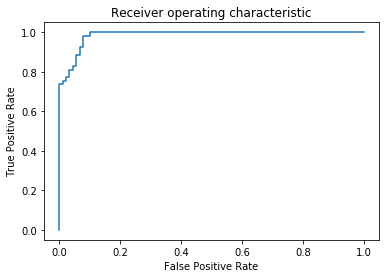

In [38]:
# create auc plot, fill in missing arguments
create_roc_curve(test, logregV2)

In [86]:
#bias v variance